In [2]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [3]:
import pandas as pd
import pickle
from category_encoders import *
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv - 50_Startups.csv.csv to 50_Startups.csv - 50_Startups.csv.csv


In [5]:
import io
train_df=pd.read_csv(io.BytesIO(uploaded['50_Startups.csv - 50_Startups.csv.csv']))

In [6]:
train_df.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [7]:
enc = OrdinalEncoder().fit(train_df)

In [8]:
df_train_encoded = enc.transform(train_df)

df_train_encoded.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


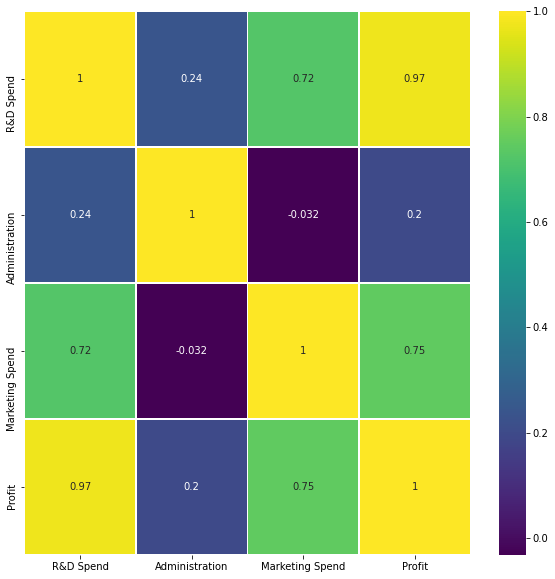

In [9]:
corremat = df_train_encoded.corr()
top_corr_features = corremat.index[(corremat['Profit'])> .1]
plt.figure(figsize=(10,10))
g= sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap='viridis',linewidths=.5)

In [10]:
X=df_train_encoded.iloc[:, :-1].values

In [11]:
y = df_train_encoded.iloc[:, 4].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred=regressor.predict(X_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test,y_pred)

0.9348088470484867

In [17]:
df =pd.DataFrame(data=y_test,columns=['y_test'])
df['y_pred'] = y_pred
df

,y_test,y_pred
0,103282.38,103083.224183
1,144259.40,132499.190985
2,146121.95,132504.920135
3,77798.83,72044.220792
4,191050.39,178578.888048
5,105008.31,116196.188979
6,81229.06,67901.098682
7,97483.56,98843.646148
8,110352.25,114025.150595
9,166187.94,167965.967806


In [18]:
regressor.predict([[165349.20,	136897.80,	471784.10,1]])

array([192938.31736002])

In [19]:
import pickle
pickle.dump(regressor,open('startup_prediction.pkl','wb'))